This is a test conducted on day one of the 5 day schedule provided by the KTP associate. The test was restricted to 30 engineers and 150 jobs due to the request limits of the routing engine and geocoder.

10 percent of the jobs (15 jobs) assigned were randomly removed and reassigned using the scheduling algorithm. The results of the test is shown as a bar graph in the end.

Please note that if the program is run again, the results generated may be different from the one displayed right now and in the dissertation report as the jobs are removed randomly.

In [2]:
#Importing Necessary Libraries
import numpy as np
import sys
import pandas as pd
import math
from numpy import nan
from math import nan, isnan
import requests
import random
import json
import sys
import geocoder as gc
from geopy import distance 
from geopy.geocoders import Nominatim
import warnings
warnings.filterwarnings(action='ignore')

#Defining Class Objects
class Engineers:
    def __init__(self,eid,location,mileage,schedule,time):
        self.eid = eid
        self.location = location
        self.schedule =schedule
        self.mileage = mileage
        self.time = time
        
    def print(self):
        print("------------------------------------")
        print("E.ID =", self.eid)
        print("Schedule =", self.schedule)
        print("Total Time =", self.time)
    
class Jobs:
    
    def __init__(self,jid,location):
        self.jid = jid
        self.location = location
        
df = pd.read_excel('5day.xlsx')

In [3]:
df

,Engineer ID,Engineer Postcode,Mileage,Total Time,Job ID1,Job Postcode1,Job ID2,Job Postcode2,Job ID3,Job Postcode3,...,Job ID5,Job Postcode5,Job ID6,Job Postcode6,Job ID7,Job Postcode7,Job ID8,Job Postcode8,Job ID9,Job Postcode9
0,9581,SW9 0SN,7,09:14:00,87036778,WC2B 6NH,87040307,WC2B 6NH,87040635,WC2B 6NH,...,87030590.0,EC1N 2HT,87030448.0,EC1N 2HT,87027894.0,EC1N 2HT,87029474.0,EC1N 2HT,87034016.0,SE1 3UN
1,9605,PO7 4SX,61,09:02:00,87039578,GU34 1SS,87044925,GU34 1SS,87042489,GU7 1LQ,...,87040771.0,PO7 7UL,87042642.0,PO7 7UL,87042381.0,PO7 7UL,NaN,NaN,NaN,NaN
2,9606,NR14 8HX,74,07:28:00,87045053,NR7 0SR,87029974,IP32 7BT,87031908,IP32 7BT,...,87037022.0,IP32 7BT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9607,ME15 0JG,72,07:24:00,87042646,SW1V 1DT,87042379,SW1W 9SJ,87041560,SW3 1JJ,...,87041517.0,TN9 1SF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9608,BN2 5PJ,107,08:34:00,87043607,KT1 1BP,87059413,W12 8AA,87043459,SE27 9AA,...,87035986.0,BN2 3QA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,9609,PE30 4BS,162,11:24:00,87041102,PE30 4LR,87044201,PE30 4LR,87044199,PE30 4LR,...,87044301.0,CB7 4AS,87044338.0,E4 8HH,NaN,NaN,NaN,NaN,NaN,NaN
6,9624,CR7 8JH,16,08:32:00,87053589,SM6 9AA,87053237,SM6 9AA,87032354,SM6 0AT,...,87038067.0,SM3 9AA,87036906.0,SM4 5RL,87036324.0,SW17 8BS,87036328.0,SW17 7EB,NaN,NaN
7,9653,TN6 2PP,73,08:26:00,87041502,RH10 8NF,87041527,KT17 1EQ,87042481,KT2 7AZ,...,87032721.0,TN1 1RG,87049198.0,TN6 2EG,NaN,NaN,NaN,NaN,NaN,NaN
8,9654,ME3 9QY,79,08:38:00,87042389,RM1 1AU,87042501,RM1 1AU,87042388,EN11 8HF,...,87051847.0,SS1 1PL,87051813.0,SS1 1PL,NaN,NaN,NaN,NaN,NaN,NaN
9,9655,NR14 6RW,199,10:38:00,87038068,IP4 4EN,87044662,CT2 8BH,87039303,IP2 0BX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Preprocessing:

a = df['Engineer ID'].tolist()
b = df['Engineer Postcode'].tolist()
c = df['Mileage'].tolist()

cols = list(df.columns)
schedules = df[cols[4:23]]

schedules['Job ID1'] = schedules['Job ID1'].astype(float)
schedules['Job ID2'] = schedules['Job ID2'].astype(float)
schedules['Job ID3'] = schedules['Job ID3'].astype(float)
schedules['Job ID4'] = schedules['Job ID4'].astype(float)
schedules['Job ID5'] = schedules['Job ID5'].astype(float)
schedules['Job ID6'] = schedules['Job ID6'].astype(float)
schedules['Job ID7'] = schedules['Job ID7'].astype(float)
schedules['Job ID8'] = schedules['Job ID8'].astype(float)
schedules['Job ID9'] = schedules['Job ID9'].astype(float)

d = [] #get schedules
for i, row in schedules.iterrows():
    x = []
    for j in range(len(row)):
        if isinstance(row[j],float):
            x.append(row[j])
    d.append(x)
    
n = [] #to remove nan
for i in range(len(d)):
    e = []
    for j in range(len(d[i])):
        if(not(math.isnan(d[i][j])) == True):
            e.append(d[i][j])
    n.append(e)
    
E = [] # Creating engineer database
for i in range(len(df)):
    E.append(Engineers(a[i],b[i],c[i],n[i],0))
    
J = []

g = schedules['Job ID1'].tolist()
h = schedules['Job Postcode1'].tolist()

for i in range(len(g)):
    J.append(Jobs(g[i],h[i]))
    
q = schedules['Job ID2'].tolist()
w = schedules['Job Postcode2'].tolist()
q = [x for x in q if isnan(x) == False]
w = [str(x) for x in w]
w = [x for x in w if x != 'nan']

for i in range(len(q)):
    J.append(Jobs(q[i],w[i]))
    
e = schedules['Job ID3'].tolist()
r = schedules['Job Postcode3'].tolist()
e = [x for x in e if isnan(x) == False]
r = [str(x) for x in r]
r = [x for x in r if x != 'nan']

for i in range(len(e)):
    J.append(Jobs(e[i],r[i]))

t = schedules['Job ID4'].tolist()
y = schedules['Job Postcode4'].tolist()
t = [x for x in t if isnan(x) == False]
y = [str(x) for x in y]
y = [x for x in y if x != 'nan']

for i in range(len(t)):
    J.append(Jobs(t[i],y[i]))

tt = schedules['Job ID5'].tolist()
yy = schedules['Job Postcode5'].tolist()
tt = [x for x in tt if isnan(x) == False]
yy = [str(x) for x in yy]
yy = [x for x in yy if x != 'nan']

for i in range(len(tt)):
    J.append(Jobs(tt[i],yy[i]))

ee = schedules['Job ID6'].tolist()
rr = schedules['Job Postcode6'].tolist()
ee = [x for x in ee if isnan(x) == False]
rr = [str(x) for x in rr]
rr = [x for x in rr if x != 'nan']

for i in range(len(ee)):
    J.append(Jobs(ee[i],rr[i]))

qq = schedules['Job ID7'].tolist()
ww = schedules['Job Postcode7'].tolist()
qq = [x for x in qq if isnan(x) == False]
ww = [str(x) for x in ww]
ww = [x for x in ww if x != 'nan']

for i in range(len(qq)):
    J.append(Jobs(qq[i],ww[i]))
    
qqq = schedules['Job ID8'].tolist()
www = schedules['Job Postcode8'].tolist()
qqq = [x for x in qqq if isnan(x) == False]
www = [str(x) for x in www]
www = [x for x in www if x != 'nan']

for i in range(len(qqq)):
    J.append(Jobs(qqq[i],www[i]))

ttt = schedules['Job ID9'].tolist()
yyy = schedules['Job Postcode9'].tolist()
ttt = [x for x in ttt if isnan(x) == False]
yyy = [str(x) for x in yyy]
yyy = [x for x in yyy if x != 'nan']

for i in range(len(ttt)):
    J.append(Jobs(ttt[i],yyy[i]))
    
data = {
    "jobs":J, "engg":E
}

In [ ]:
#Function to get qualified engineers
def get_qualified(data,job):
    qualified = []
    for i in E:
        if(get_job(job,J).skill in i.skill):
            qualified.append(i)
    return qualified

#Function which returns job details from job id
def get_job(key,arr):
    for i in arr:
        if(i.jid == key):
            return i
    return None

#OSRM TSP function:
def osrm_tsp(data): 
    lat = []
    long = []
    for i in range(len(data)):
        lats, longs = None, None 
        g = gc.arcgis(data[i])
        if g is None:
            continue
        else:
            lats, longs = g.latlng
            lat.append(lats)
            long.append(longs)
    json_data = []
    lurl = ""
    for i in range(len(lat)):
        lurl += f'{long[i]},{lat[i]};'
    url = 'http://127.0.0.1:5000/trip/v1/driving/'
    url += lurl[:-1]
    url += '?source=first'
    r = requests.get(url)
    json_data.append(r.json())
    for i in range(len(json_data[0]['waypoints'])):
        if(i==0):
            continue
        json_data[0]['waypoints'][i].update({"JID":data[i]})
    json_data[0]['waypoints'].sort(key = lambda x:x["waypoint_index"])
    schedule = []
    for i in json_data[0]['waypoints']:
        if('JID' in i):
            schedule.append(i['JID'])
    outputs = {
        "Duration": json_data[0]['trips'][0]['duration'],
        "Schedule": schedule
    }
    return outputs

#Shift Operator
def shift_op(data,job,qualified):
    print("The Engineers qualified for Job J :")
    qe = [x+1 for x in qualified]
    print(qe)
    for i in qualified:
        print("\nShifting in Engineer: {}:".format(data["engg"][i].eid))
        arr = []
        for j in range(len(data["engg"][i].schedule)):
            arr.append(get_job(data["engg"][i].schedule[j],data["jobs"]))
        arr.append(job)
        maps = calculate_time_tsp(arr,data["engg"][i])
        time = maps["Duration"]
        print("\nTotal Time Required : {} \n".format(time))
        if( time <= 800 and time > 0):
            data["jobs"].append(job)
            print("Job J Assigned Successfully \n")
            data["engg"][i].schedule = []
            for l in maps["Schedule"]:
                data["engg"][i].schedule.append(l)
            return data
        print("Shifting Failed \n")
    return -1

#Task Move Operator
def task_move_op_tsp(data,job,qualified):
    print("The Engineers qualified for Job N :")
    qe = [x+1 for x in qualified]
    print(qe)
    for i in qualified:
        print("\nTask Moving in Engineer: {}".format(data["engg"][i].eid))
        for j in range(len(data["engg"][i].schedule)):
            arr = []
            for k in range(len(data["engg"][i].schedule)):
                if(k==j):
                    continue
                arr.append(get_job(data["engg"][i].schedule[k],data["jobs"]))
            arr.append(job)
            maps = calculate_time_tsp(arr,data["engg"][i])
            time = maps["Duration"]
            print("Total Time Required : {} \n".format(time))
            if( time <= 800 and time > 0):
                print("Assigning Task Moved Job to another Engineer :\n")
                job_1 = get_job(data["engg"][i].schedule[j],data["jobs"])
                qualified_1 = get_qualified(data,job_1)
                print("The Engineers qualified for the moved Job :\n")
                qqe = [x+1 for x in qualified_1]
                print(qqe)
                print("\n")
                for l in qualified_1:
                    if(i!=l):
                        print("Attempting to assign job to Engineer {}:\n".format(data["engg"][l].eid))
                        arr_1 = []
                        for n in range(len(data["engg"][l].schedule)):
                            arr_1.append(get_job(data["engg"][l].schedule[n],data["jobs"]))
                        arr_1.append(job_1)
                        maps_1 = calculate_time_tsp(arr_1,data["engg"][l])
                        time_1 = maps_1["Duration"]
                        print("Total Time Required : {} \n".format(time_1))
                        if( time_1 <= 800 and time_1 > 0):
                            data["engg"][i].schedule = maps["Schedule"]
                            data["engg"][l].schedule = maps_1["Schedule"]
                            data["jobs"].append(job)
                            print("Job N Assigned Successfully\n")
                            return data 
                print("Not Possible \n")
        print("Task Move Failed \n")
    return -1

In [4]:
#Calulating Total Time of Schedules
for i in data["engg"]:
    if not i.schedule:
        continue
    addresses = [i.location]
    for j in i.schedule:
        addresses.append(get_job(j,data["jobs"]).location)
    x = osrm_tsp(addresses)
    i.time = x["Duration"]/60

In [8]:
#Total time of each schedule
atime = []
for i in data["engg"]:
    atime.append(i.time)

In [9]:
#Choosing 15 Random Jobs from schedule
rj = []
for i in range(30):
    x = random.choice(J)
    rj.append(x.jid)
p = set(rj)
q = list(p)
a = q[0:15]

In [12]:
# Function that removes Jobs from schedule
def job_remove(rj):
    for i in data["engg"]:
        z = i.schedule
        for j in z:
            addresses = []
            if(j in rj):
                i.schedule.remove(j)
                if(not i.schedule):
                    continue
                else:
                    addresses = [i.location]
                    for k in i.schedule:
                        addresses.append(get_job(k,data["jobs"]).location)
                    x = osrm_tsp(addresses)
                    i.time = x["Duration"]/60

In [13]:
job_remove(a)

In [14]:
#OSRM TSP Funtion which returns job IDs
def osrm_tsp_v2(eng,job):
    lat = []
    long = []
    z = []
    for m in eng.schedule:
        z.append(m)
    z.append(job)
    addresses = [eng.location]
    for j in eng.schedule:
        addresses.append(get_job(j,data["jobs"]).location)
    addresses.append(get_job(job,data["jobs"]).location)
    for i in range(len(addresses)):
        lats, longs = None, None 
        g = gc.arcgis(addresses[i])
        if g is None:
            print("Error")
            continue
        else:
            lats, longs = g.latlng
            lat.append(lats)
            long.append(longs)
    json_data = []
    lurl = ""
    for i in range(len(lat)):
        lurl += f'{long[i]},{lat[i]};'
    url = 'http://127.0.0.1:5000/trip/v1/driving/'
    url += lurl[:-1]
    url += '?source=first'
    r = requests.get(url)
    json_data.append(r.json())
    for i in range(len(json_data[0]['waypoints'])):
        if(i==0):
            continue
        json_data[0]['waypoints'][i].update({"JID":z[i-1]})
    json_data[0]['waypoints'].sort(key = lambda x:x["waypoint_index"])
    schedule = []
    for i in json_data[0]['waypoints']:
        if('JID' in i):
            schedule.append(i['JID'])
    outputs = {
        "Duration": json_data[0]['trips'][0]['duration'],
        "Schedule": schedule
    }
    return outputs

In [15]:
# Function which reassigns jobs back to the schedule
def job_add(rj):
    for i in rj:
        addresses = []
        x = sys.float_info.max
        y = 0
        s = []
        for j in data["engg"]:
            if(len(j.schedule)==9):
                continue
            time = 0
            ans = osrm_tsp_v2(j,i)
            time = ans["Duration"]/60
            if(time < x):
                x = time
                y = j.eid
                s = ans["Schedule"]
        for l in data["engg"]:
            if(l.eid==y):
                l.time = x
                l.schedule = s

In [16]:
#Jobs were added in batches to prevent routing engine and geocoder from timing out

job_add(a[0:3])

job_add(a[3:6])

job_add(a[6:9])

job_add(a[9:12])

job_add(a[12:15])

In [23]:
#Total time of schedules after reinsertion
ctime = []
for i in data["engg"]:
    ctime.append(i.time)

In [25]:
atime

[37.794999999999995,
 120.19833333333332,
 124.645,
 172.765,
 238.17000000000002,
 252.03833333333333,
 60.50833333333333,
 179.48666666666668,
 217.575,
 404.3316666666667,
 69.13333333333334,
 327.8833333333333,
 275.13,
 242.82999999999998,
 195.70833333333334,
 139.29166666666666,
 222.61,
 226.38500000000002,
 230.88333333333333,
 97.46166666666666,
 177.80333333333334,
 282.7866666666667,
 196.33666666666667,
 185.77166666666665,
 108.46666666666667,
 210.07166666666666,
 113.69833333333332,
 385.30333333333334,
 284.3433333333333,
 188.265]

In [24]:
ctime

[37.794999999999995,
 178.685,
 124.645,
 175.38666666666668,
 238.17000000000002,
 252.03833333333333,
 61.405,
 179.48666666666668,
 212.64166666666668,
 176.23166666666665,
 69.13333333333334,
 327.8833333333333,
 275.13,
 242.82999999999998,
 208.00833333333333,
 139.29166666666666,
 222.61,
 226.38500000000002,
 223.03333333333333,
 123.045,
 177.80333333333334,
 282.7866666666667,
 196.33666666666667,
 163.73666666666668,
 143.91833333333335,
 210.07166666666666,
 159.68333333333334,
 385.30333333333334,
 284.3433333333333,
 188.265]

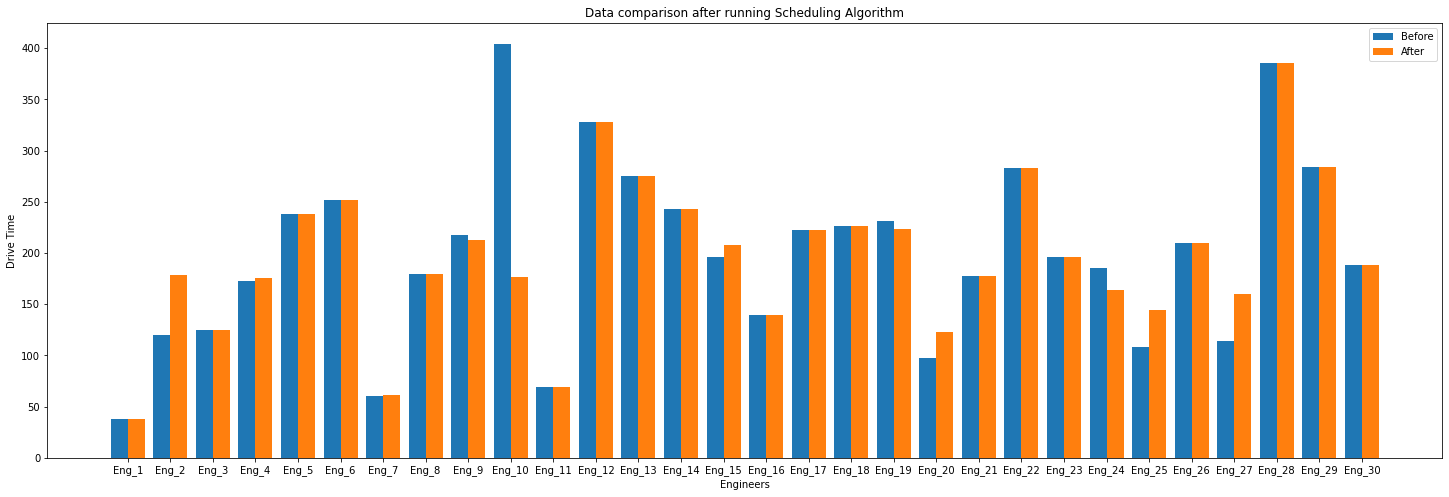

In [46]:
import numpy as np 
import matplotlib.pyplot as plt 
  
X = ['Eng_1','Eng_2','Eng_3','Eng_4','Eng_5','Eng_6','Eng_7','Eng_8','Eng_9','Eng_10','Eng_11','Eng_12','Eng_13','Eng_14','Eng_15','Eng_16','Eng_17','Eng_18','Eng_19','Eng_20','Eng_21','Eng_22','Eng_23','Eng_24','Eng_25','Eng_26','Eng_27','Eng_28','Eng_29','Eng_30']
plt.figure(figsize=(25,8))  
X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, atime, 0.4, label = 'Before')
plt.bar(X_axis + 0.2, ctime, 0.4, label = 'After') 
plt.xticks(X_axis, X)
plt.xlabel("Engineers")
plt.ylabel("Drive Time")
plt.title("Data comparison after running Scheduling Algorithm")
plt.legend() 
plt.show()



In [50]:
#Total Drive Time Before
adt = 0
for i in atime:
    adt+=i

In [51]:
adt

5967.676666666667

In [52]:
#Total Drive Time After
bdt = 0
for i in ctime:
    bdt+=i

In [53]:
bdt

5886.083333333334